In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
happiness_2021=pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")
happiness_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
hapiness_report=pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")
hapiness_report.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


Basic understanding for column meanings

life ladder:The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you

GDP per capita:GDP per capita stands for Gross Domestic Product (GDP) per capita (per person). It is derived from a straightforward division of total GDP by the population.

Social support: Social support means having friends and other people, including family, to turn to in times of need or crisis

Healthy life expectancy at birth: The average equivalent number of years of full health that a newborn could expect to live

Freedom to make life choices: Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.

Generosity: the quality of kindness and generous.

Perceptions of corruption: perceived levels of public sector corruption, as determined by expert assessments and opinion surveys

In [5]:
happiness_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [6]:
happiness_2021.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [7]:
happiness_2021.shape

(149, 20)

In [8]:
hapiness_report.shape

(1949, 11)

<AxesSubplot:>

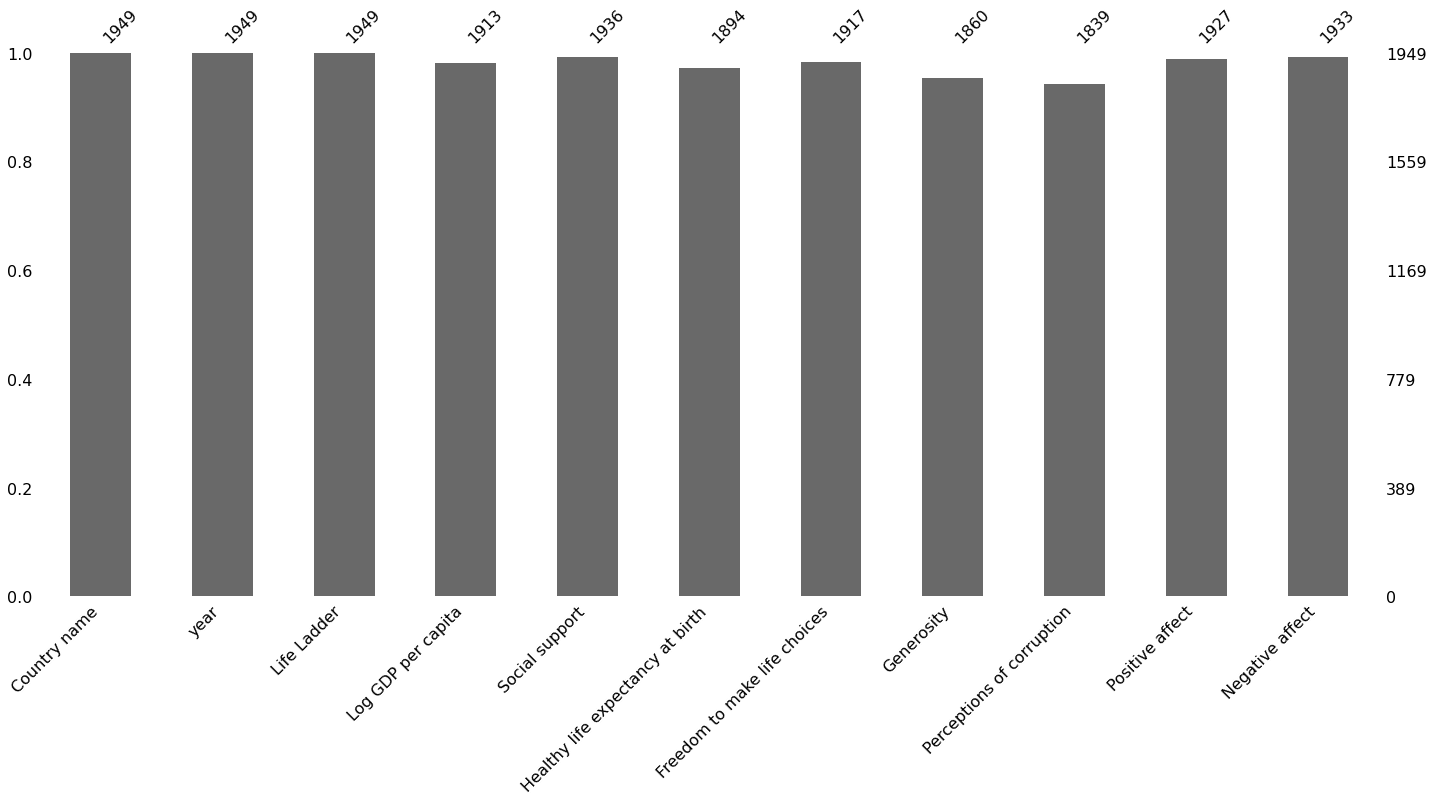

In [9]:
import missingno as msno
msno.bar(hapiness_report)

<AxesSubplot:>

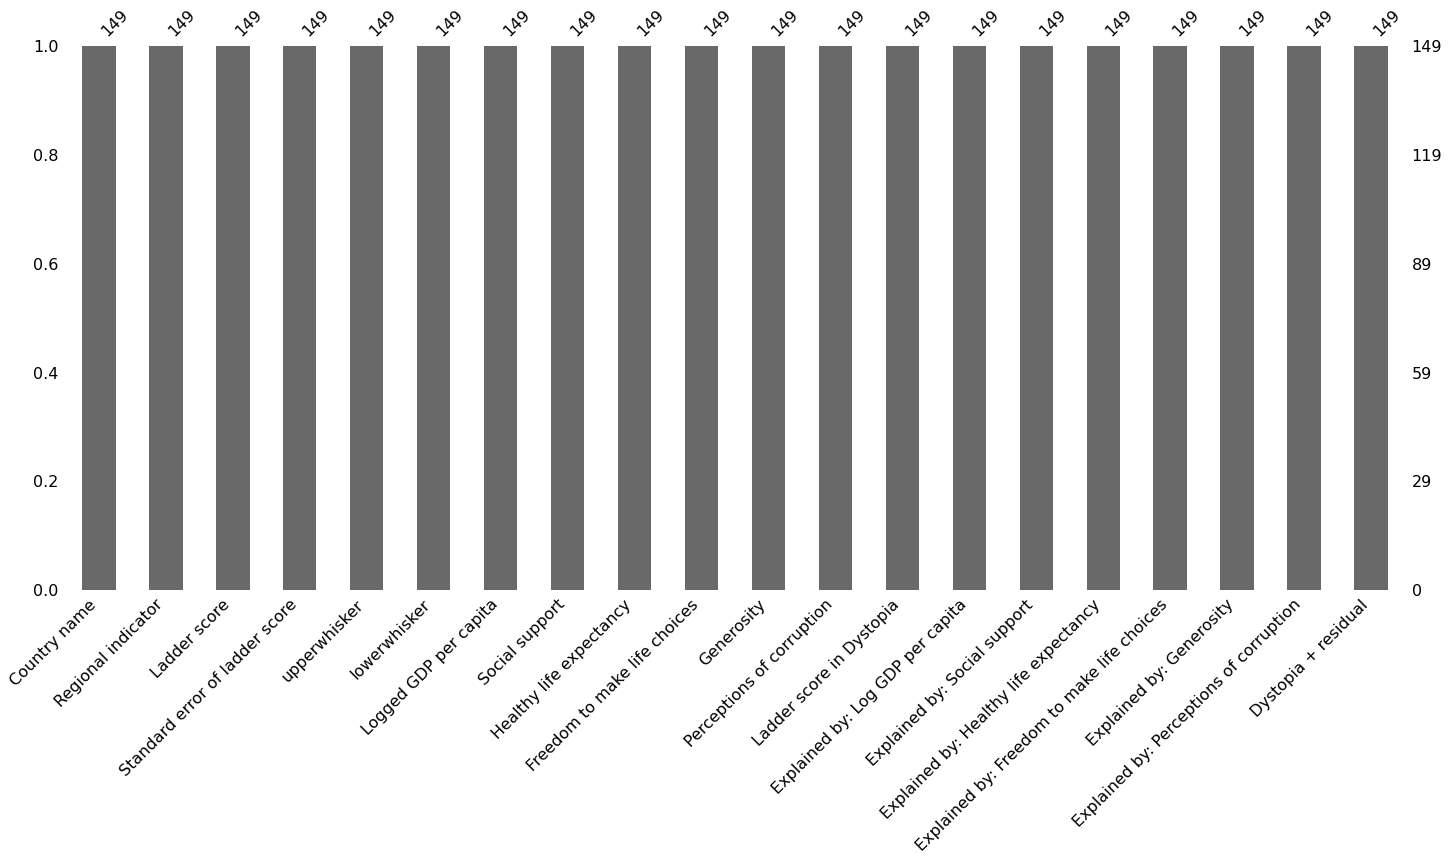

In [10]:
msno.bar(happiness_2021)

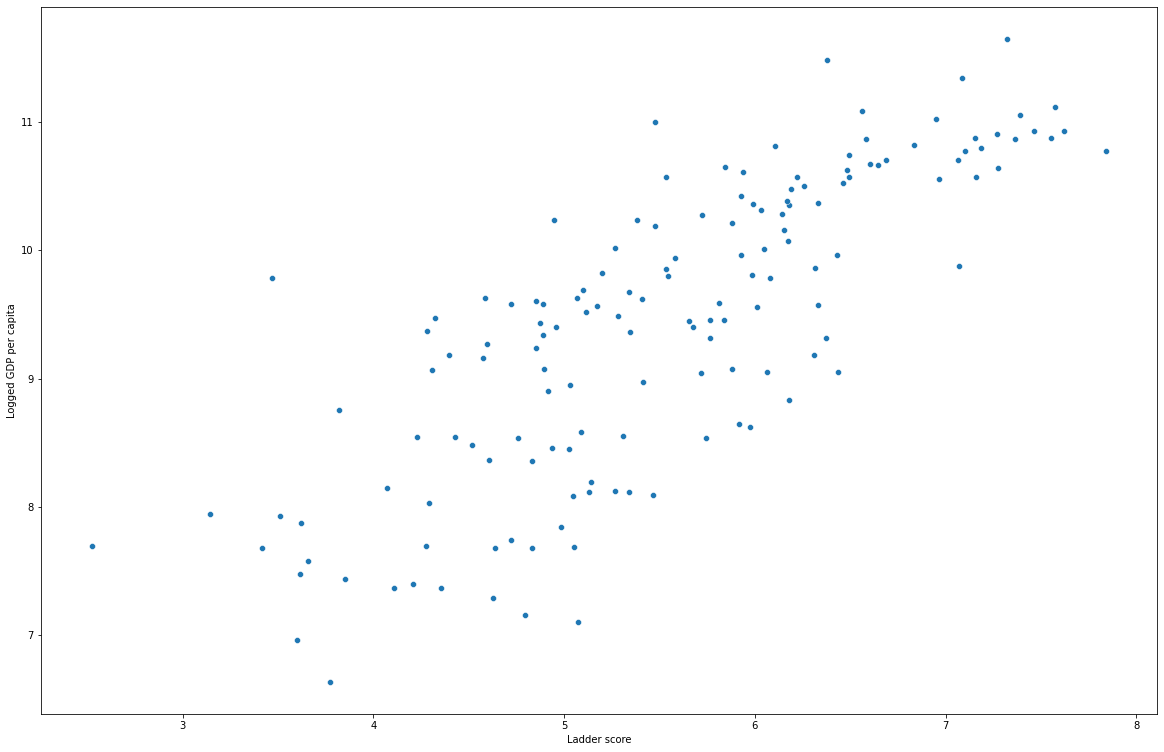

In [11]:
plt.figure(figsize=(20,13))
sns.scatterplot(data= happiness_2021, x='Ladder score',y='Logged GDP per capita')
plt.show()

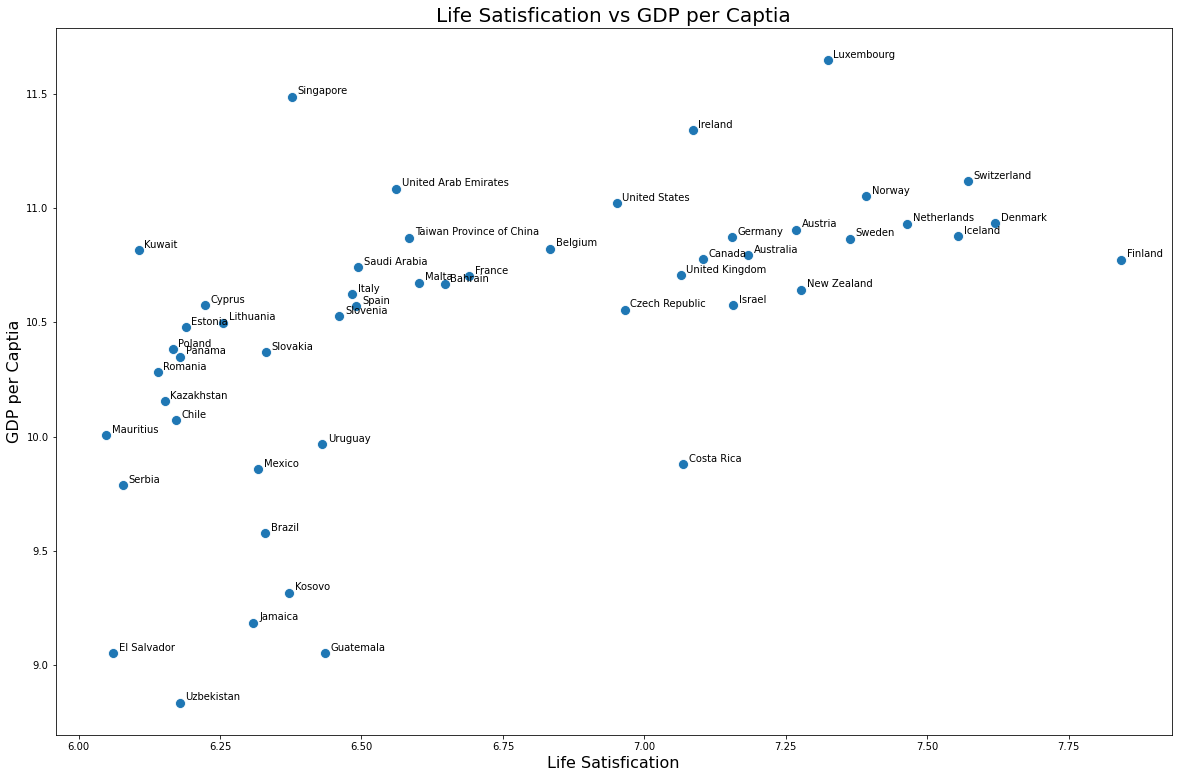

In [12]:
happiness_2021 = happiness_2021[:50]
plt.figure(figsize=(20,13))
sns.scatterplot(data= happiness_2021, x='Ladder score',y='Logged GDP per capita',s=100)
plt.title('Life Satisfication vs GDP per Captia',fontsize=20)
plt.xlabel('Life Satisfication',fontsize=16)
plt.ylabel('GDP per Captia',fontsize=16)
for i in range(len(happiness_2021)):
    plt.text(s =happiness_2021.loc[i,'Country name'], x=happiness_2021.loc[i,'Ladder score']+0.01,y=happiness_2021.loc[i,'Logged GDP per capita']+0.01, fontsize=10)
plt.show()

In [13]:
hapiness_report.fillna(0,inplace= True)

In [14]:
hapiness_report

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [15]:
#creating total overall score column
hapiness_report["Total_score"]=(hapiness_report["Life Ladder"]+hapiness_report["Log GDP per capita"]+hapiness_report["Social support"]+hapiness_report["Healthy life expectancy at birth"]+hapiness_report["Freedom to make life choices"]+hapiness_report["Generosity"]+hapiness_report["Positive affect"])- (hapiness_report["Perceptions of corruption"]+hapiness_report["Negative affect"])

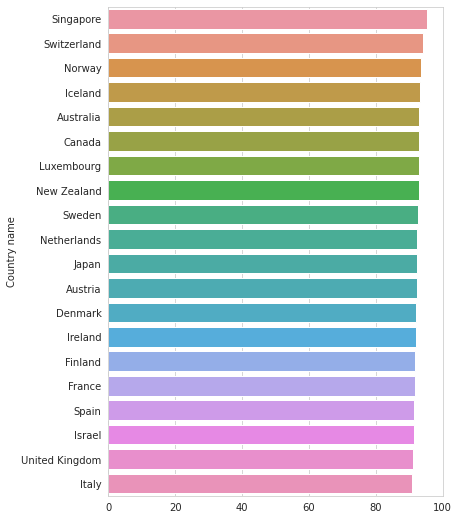

In [16]:
#Top 20 happiest countries based on overall total score/index
#Singapore,Switzerland,Norway can be considered most happy countries based on overall total scores
#Other notable countries in the top 20 are Australia,United Kingdom,Japan,Spain,Canada,etc
x= hapiness_report.groupby("Country name")["Total_score"].mean().sort_values(ascending= False).head(20)
sns.set_style("whitegrid")
plt.figure(figsize=(6,9))
sns.barplot(x=x.values,y=x.index)
plt.show()

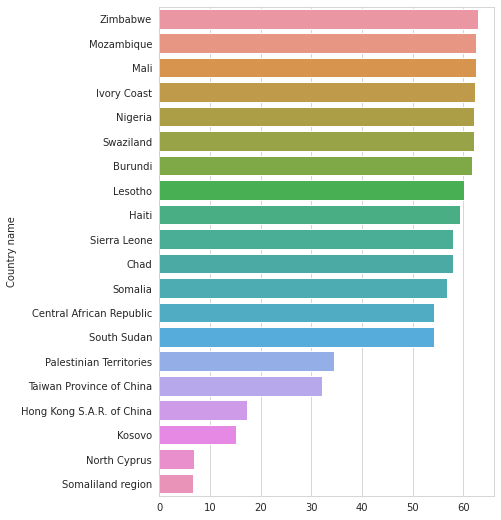

In [17]:
#Least 20 happiest countries based on overall total score
#Somaliland region,Kosovo,North Cyprus have the lowest happiness score 
#Other notable countries having lowest happiness index are Zimbabwe,Haiti,Nigeria,Ivory Coast,etc
x= hapiness_report.groupby("Country name")["Total_score"].mean().sort_values(ascending= False).tail(20)
sns.set_style("whitegrid")
plt.figure(figsize=(6,9))
sns.barplot(x=x.values,y=x.index)
plt.show()

<AxesSubplot:>

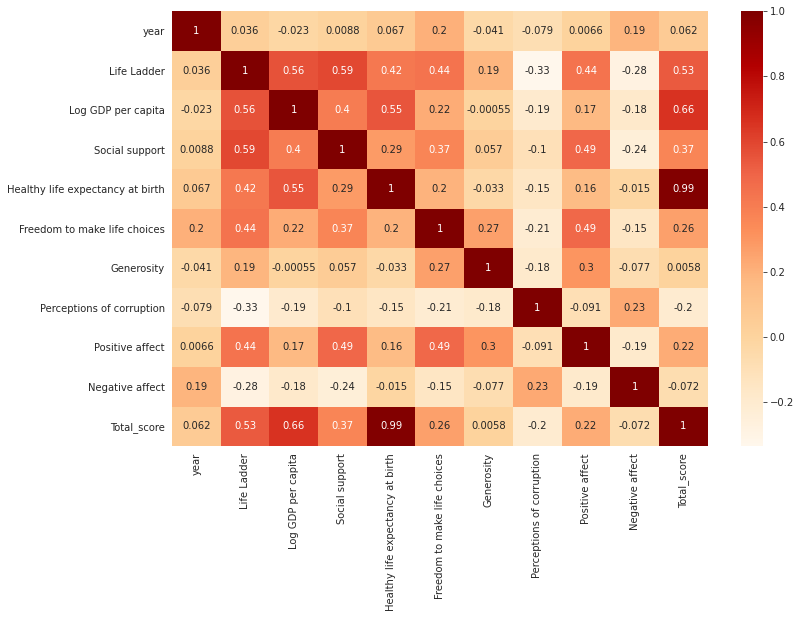

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(data=hapiness_report.corr(),annot=True,cmap="OrRd")

<Figure size 720x720 with 0 Axes>

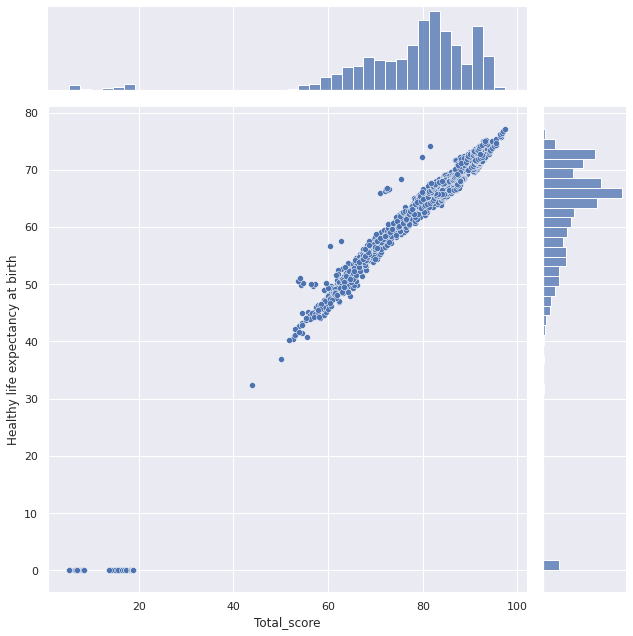

In [19]:
#Correlation between Life expectancy at birth and the total overall index
#The below plot shows similar relation to that of GDP with overall score
#Life expectancy at birth score of a country can pretty much show how the overall hapiness of a country score is
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
sns.jointplot(x="Total_score",y= "Healthy life expectancy at birth",data= hapiness_report,height=9 )
plt.show()

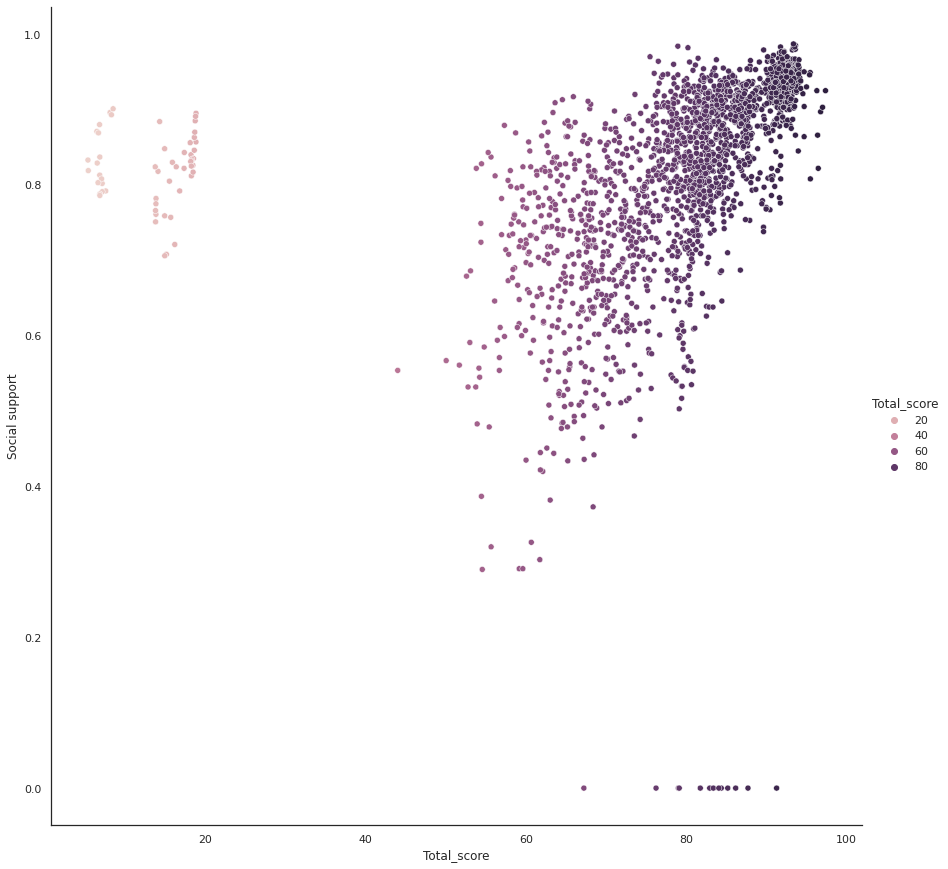

In [20]:
#How social support impacts overall happiness score
#Countries having high score for total happiness index correlate with the high score of social support

sns.set_theme(style="white")
sns.relplot(x="Total_score",y= "Social support",data= hapiness_report,hue= "Total_score",height=12)

<AxesSubplot:xlabel='Life Ladder', ylabel='Total_score'>

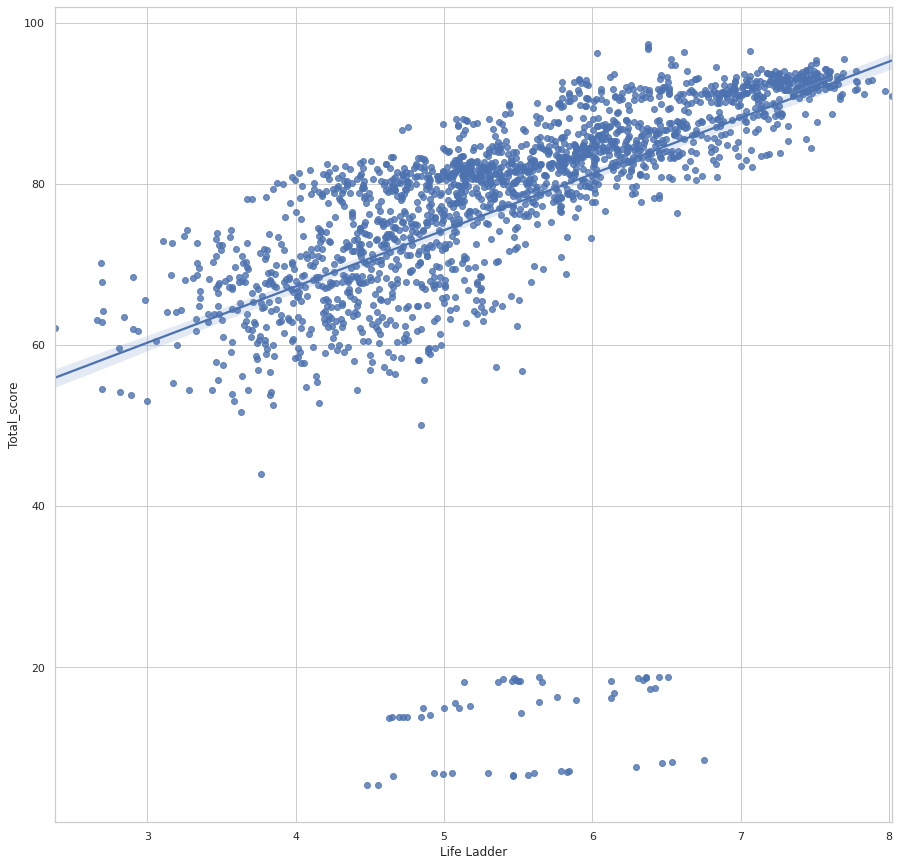

In [21]:
#Total happiness score corelation with the life ladder score of the countries
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid")
sns.regplot(x="Life Ladder",y= "Total_score",data= hapiness_report)

<Figure size 432x432 with 0 Axes>

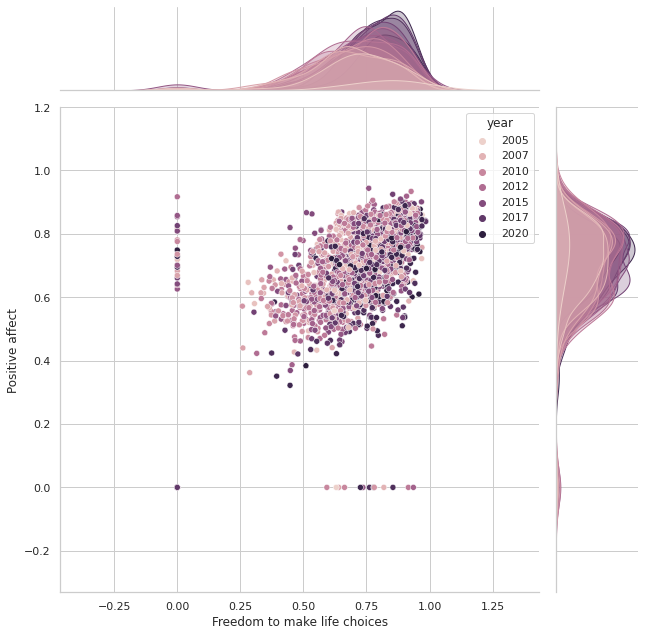

In [22]:
#Positive affects score correlation with freedom to make life choices
plt.figure(figsize=(6,6))
sns.jointplot(x="Freedom to make life choices",y= "Positive affect",data= hapiness_report ,hue="year",height= 9)

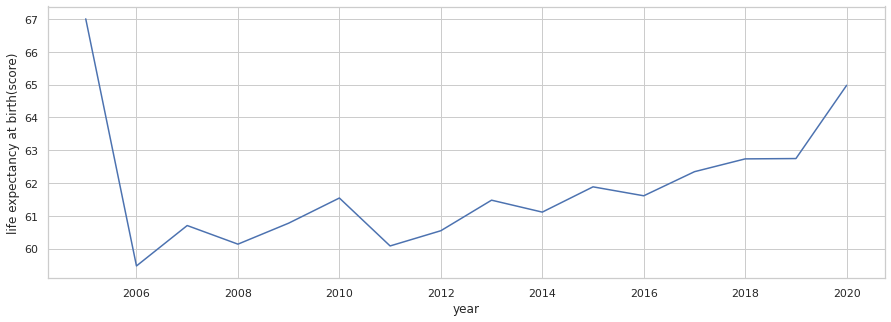

In [23]:
#Life expectancy  at birth over the years
#Life expectancy has shown upward trend with the time with improvement of medical fields in recent years
plt.figure(figsize=(15,5))
x= hapiness_report.groupby("year")["Healthy life expectancy at birth"].mean()
ax= sns.lineplot(x=x.index,y=x.values)
ax.set_ylabel("life expectancy at birth(score)")
plt.show()

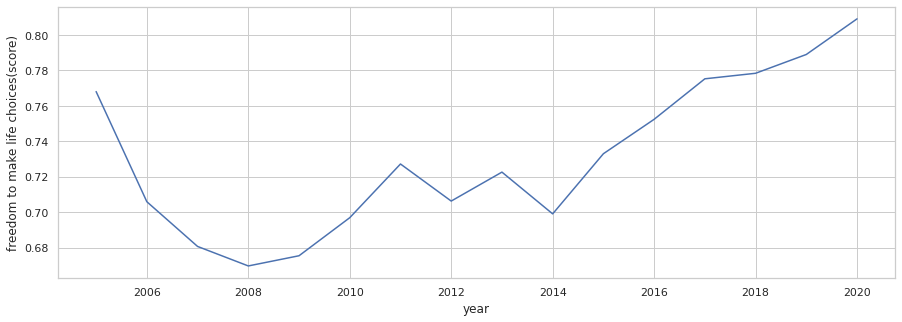

In [24]:
#Freedom to make life choices scores over the years
#The trend is similar to above upward trend over time
plt.figure(figsize=(15,5))
x= hapiness_report.groupby("year")["Freedom to make life choices"].mean()
ax= sns.lineplot(x=x.index,y=x.values)
ax.set_ylabel("freedom to make life choices(score)")
plt.show()

In [25]:
#top 10 countries having best freedom to make life choices
#Norway ,Denmark,Finland have top scores based on freedom to make life choices
#Notable entry is Somalia having score of 0.9 and making it in top 10 for freedom of life choices
hapiness_report.groupby("Country name")["Freedom to make life choices"].mean().sort_values(ascending= False).head(10)

Country name
Norway         0.954400
Denmark        0.945067
Finland        0.939692
Iceland        0.931500
Sweden         0.929600
Canada         0.927933
Switzerland    0.924700
New Zealand    0.923143
Australia      0.921714
Somalia        0.919667
Name: Freedom to make life choices, dtype: float64

In [26]:
#top 10 countries having least freedom to make life choices
#Cuba has the least score in terms of freedom to make lif choices
#Iraq,Madagascar,Haiti,Algeria are countries that make it in the least 10
hapiness_report.groupby("Country name")["Freedom to make life choices"].mean().sort_values(ascending= False).tail(10)

Country name
Chad                      0.499500
Bosnia and Herzegovina    0.497615
South Sudan               0.493750
Iraq                      0.477917
Madagascar                0.469091
Haiti                     0.461636
Angola                    0.456250
Burundi                   0.450800
Algeria                   0.389375
Cuba                      0.281000
Name: Freedom to make life choices, dtype: float64

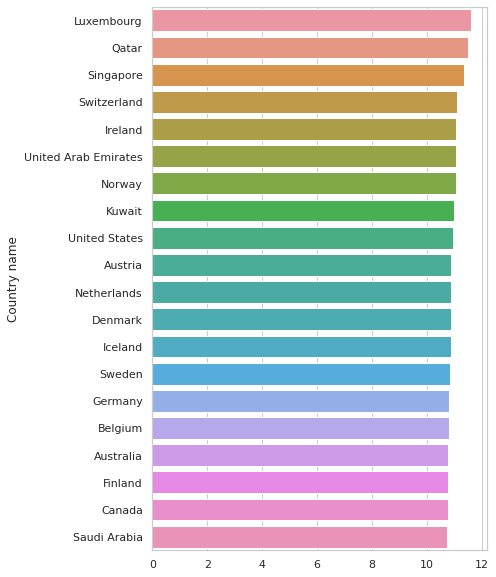

In [27]:
#top 20 countries having best GDP per capita 
plt.figure(figsize=(6,10))
x= hapiness_report.groupby("Country name")["Log GDP per capita"].mean().sort_values(ascending= False).head(20)
sns.barplot(x=x.values,y=x.index)
plt.show()

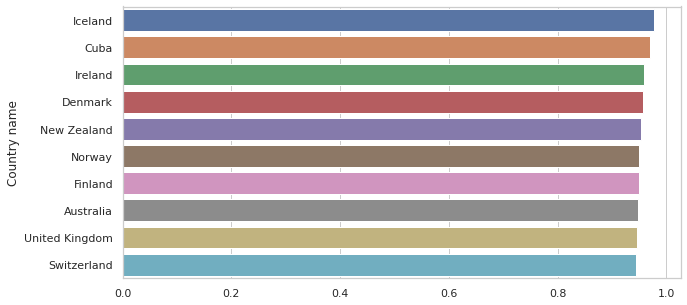

In [28]:
#top 10 countries having best social support
plt.figure(figsize=(10,5))
x= hapiness_report.groupby("Country name")["Social support"].mean().sort_values(ascending= False).head(10)
sns.barplot(x=x.values,y=x.index)
plt.show()

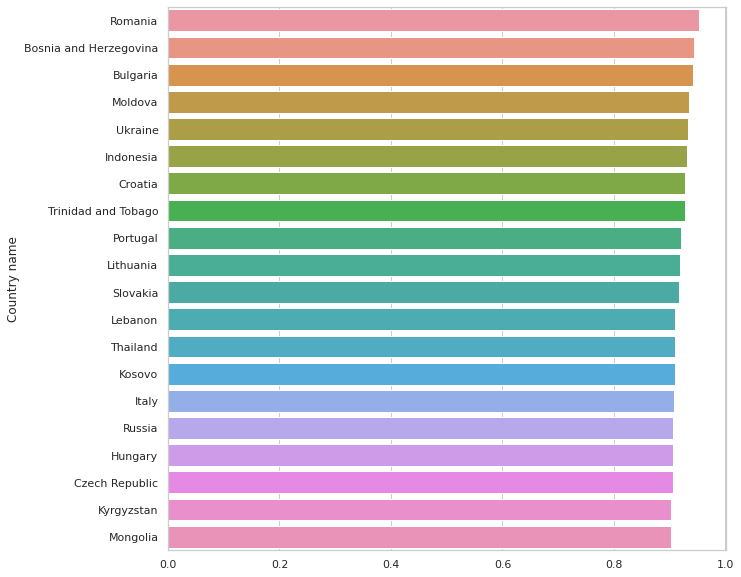

In [29]:
#top 20 countries having highest Perceptions of corruption
#Romania has highest score for perceptions of corruption followed by Bosnia and Herzegovina and Bulgaria
#Other notable countries are Portugal,Thailand,Italy,Russia,etc
plt.figure(figsize=(10,10))
x= hapiness_report.groupby("Country name")["Perceptions of corruption"].mean().sort_values(ascending= False).head(20)
sns.barplot(x=x.values,y=x.index)
plt.show()

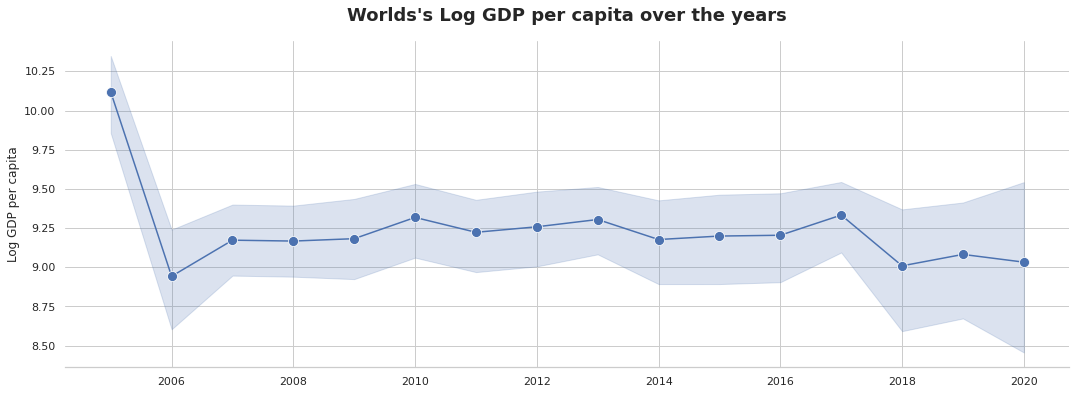

In [30]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='year', y='Log GDP per capita', data=hapiness_report, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title('Worlds\'s Log GDP per capita over the years', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()